# Reading in Climate Data + Plotting a Regionally Averaged Time Series
### **Authors**

Fletcher Hozven fhozven@ucsb.edu

Samantha Stevenson sstevenson@ucsb.edu


### **Table of Contents**

[Goals](#purpose)

[Download and Import Needed Packages](#import)

[Locate and Open the Downloaded Climate File](#open)

[Print and Analyze the Data](#print)

[Convert the Time Variable to DateTime Format](#time)

[Calculate Regional Average](#variable)

[Plot!](#Plot)

<a id='purpose'></a> 
## **Goals**

This tutorial provides instructions on how to read in data from a netCDF file located on your local machine into Jupyter Notebook, use a mask to select data within a region of interest, average all data in the file over the latitude and longitude dimensions, and create a simple time series plot of the data. _note: this is for demonstration only, and is technically not the most scientifically correct way to do this; see our tutorial ["Weight Grid Cells"](https://github.com/climate-datalab/Getting-Started-Tutorials/blob/main/5.%20Weight%20Grid%20Cells%20%2B%20Plot%20Global%20Average.ipynb) for more details!_

The steps below assume _you have_ Jupyter Notebook and conda already installed on your machine, and have the data file you'd like to plot downloaded in the form of a netCDF file on your machine as well. For now, you can use this direct link to the file specified in the code blocks below!

#### [File for Today: Historical Surface Air Temperature from the Canadian Earth System Model version 5 (CanESM5)](https://drive.google.com/file/d/1TaWe1hs6Lgr-AEM1y74xGA3EBaECyMMV/view?usp=sharing)

See our handy [climate model filename decoder](http://www.climate-datalab.org/filename-decoder) if you're confused about why this file is called what it's called, and check out the [Naming Conventions](https://climate-datalab.org/model-naming-conventions/) section of the Climate DataLab website.

If you need more information on how to configure your machine or download other data files, check out our other tutorials:
- [Installing Jupyter Notebook/Conda]()
- [Data Download: Web](https://climate-datalab.org/data-download-from-web/) 

**What is a time series plot?**

A time series plot is a type of graph that visually displays data points collected over a period of time, where the x-axis represents time and the y-axis represents the measured variable, allowing you to identify trends and patterns in data as it changes over time. A time series is a way to plot data points against time to see how a variable evolves over a specific period. 

Here is an example of a time series plot, showing global surface temperature _anomaly_ (difference from the average over a reference period):

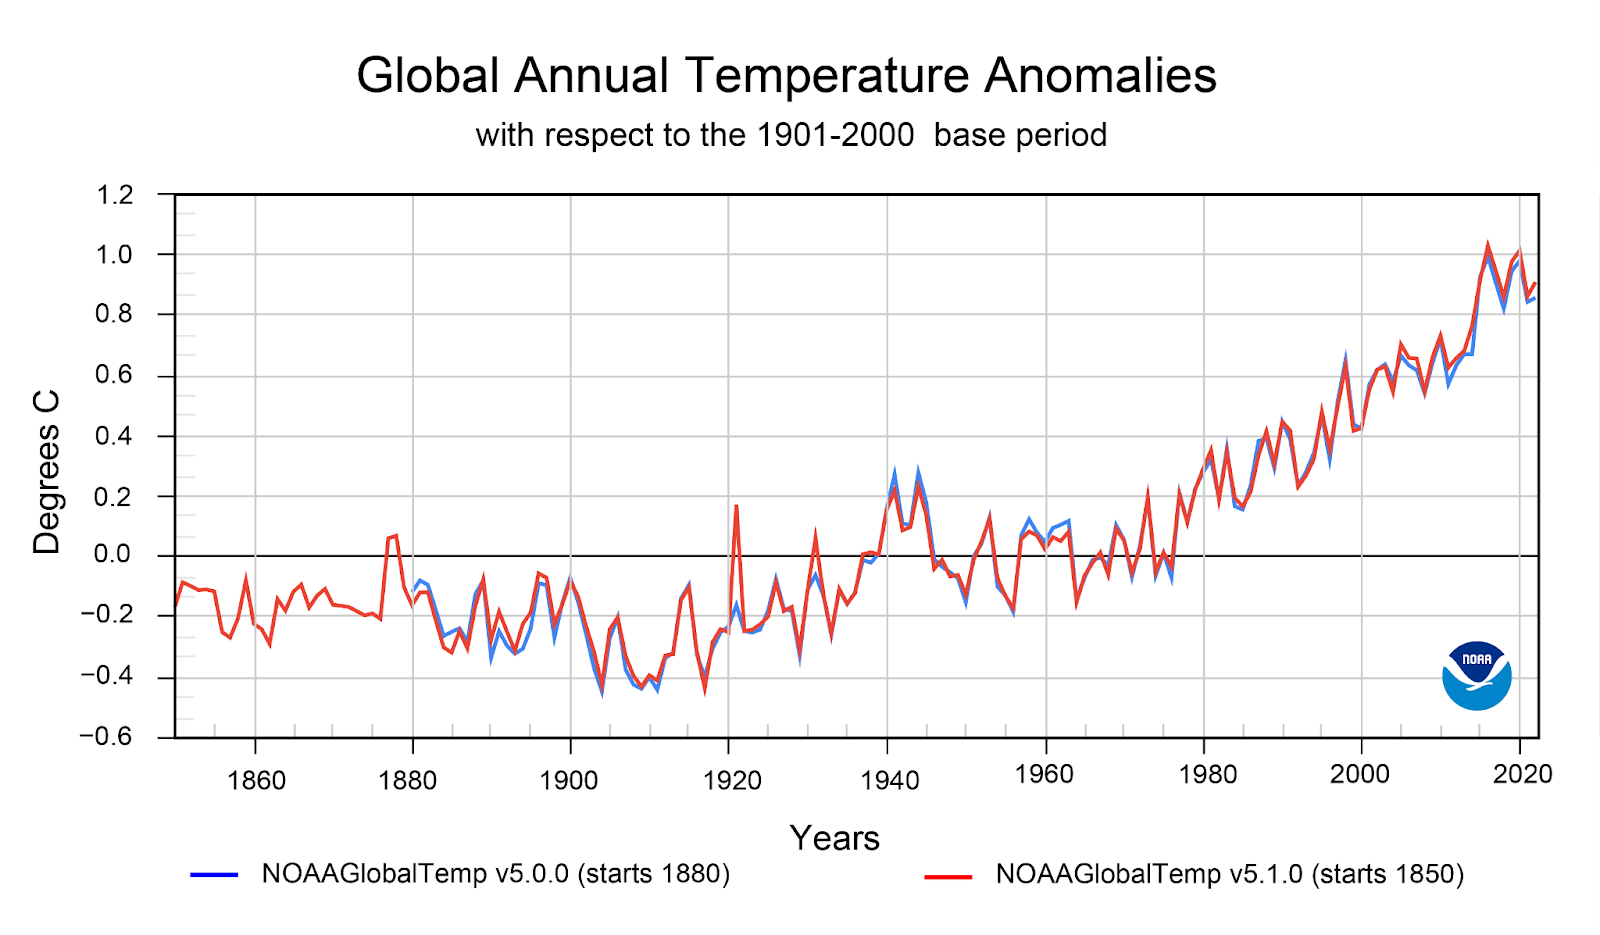

The tutorial below will generate a similar-looking plot, but our temperatures will be actual temperatures, rather than anomalies relative to a baseline. If you'd like more information about how to calculate anomalies, see our [Anomalies](https://github.com/climate-datalab/Getting-Started-Tutorials/blob/main/6.%20Anomalies.ipynb) tutorial!

**What is a Regional Average ?**

A 'Regional Average' refers to the mean value calculated from a set of data points within a specific geographical area, such as neighboring temperature sites within a radius of 100 km. [Encyclopedia of Physical Science and Technology (Third Edition), 2003](https://www.sciencedirect.com/science/article/pii/B0122274105003021)

**Why are Regional Averages Important ?**

Regional averages are crucial in climate science because they allow scientists to understand how climate change is impacting specific geographic areas, providing more detailed information about local effects like altered precipitation patterns, temperature variations, and extreme weather events, which are often significantly different from global averages, enabling better adaptation strategies and policy decisions at the community level. 

<a id='import'></a> 
## **Download + Import Needed Packages**

You will need the `xarray` and `matplotlib` packages in your Python environment in order to complete this tutorial. If these have not already been installed, you can use the following commands in your __Terminal__ (Mac) or __Anaconda Prompt__ (Windows) to install them:

`conda install xarray`

`conda install matplotlib`

Great! The needed packages for our time series graph are now installed in the terminal. To make them accessible to Python, let's quickly import them:

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

What are we installing and importing exactly?
- [xarray](https://docs.xarray.dev/en/latest/getting-started-guide/why-xarray.html) can read and write NetCDF files. For us this will open our netCDF file as an xarray object, which we can then easily manipulate.
- [matplotlib](https://matplotlib.org/) is a plotting library that will be used to plot maps and geospatial data

<a id='open'></a> 
## **Locate and Open the Downloaded Climate File**

Now we need to tell Python where to find the file containing climate information. This is done by specifying the file _path_, the directory where the file is located, in addition to the name of the file. You can find the path either using the Finder (Mac) or Windows Explorer, or use a quick hack:

- To find the file path name grab the downloaded file out of your finder/desktop and drag it into your terminal!
-  The terminal will spit out the name of where to find the file
-  Now Copy and paste the location of that file.
- For me it is `/Users/samstevenson/Box Sync/Climate_DataLab/tas_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc`

Once you've found the file path, the next step is to use the imported package Xarray to open the data set. We’ll use the `open_dataset()` function from xarray to open the NetCDF file. This will be referred to using the syntax `xr.open_dataset()`, where `xr` is the "alias" you gave the xarray package when it was imported.

All you need to do is to copy the terminal code that revealed the location of the file in your computer and paste it into the `xr.open_dataset()` function. This function then reads the file and loads it into an xarray.Dataset object which allows for easy manipulation and analysis of the data.

In [2]:
data = xr.open_dataset('/Users/samstevenson/Box Sync/Climate_DataLab/tas_Amon_CanESM5_historical_r10i1p1f1_gn_185001-201412.nc')

<a id='print'></a> 
## **Print and Analyze the Data**

It's good practice after reading information from a data file into xarray, to u se the `print` function to take a quick look at what's inside. Here, the block of code above has resulted in an xarray object called `data` - but what's in there??


 __We print the dataset because it...__
- Provides a clear picture of what the data looks like and what we have to work with
- Allows us to verify that the necessary variables (e.g, `tas` for near-air surface temperature) are present in the dataset
- Gives an indication of whether the dataset covers the required time range and geographical region that we may need if we were to plot or analyze the data

In [3]:
print(data)

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/53)
    CCCma_model_hash:            55f484f90aff0e32c5a8e92a42c6b9ae7ffe6224
    CCCma_parent_runid:          rc3.1-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his10
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/5ed65f

__Let's detail exactly what is in our data...__
 _This information will differ given the data set you use! Dont worry if your data looks different_

 __Dimensions:__
- __lat: 64__ This indicates there are 64 latitude points.
- __lon: 128__ This signifies there are 128 longitude points.
- __time: 1980__ This represents 1980 time steps. The temporal resolution of this particular dataset happens to be monthly; so each time step here is equal to one month.
- __bnds: 2__ This is an additional dimension used for the upper and lower bounds of a coordinate (don't worry about this one too much).

__Coordinates:__

 __Latitude (lat):__ float64
- Values range from approximately -87.86° to 87.86°, covering almost the entire latitude span of the Earth.
  
__Longitude (lon):__ float64 
- Values range from 0.0° to 357.2°, nearly covering the entire globe.
  
__Height (Height):__ float64 
- This value is representing the elevation of the air surface temperature data

 __Time (time):__ object 
- Time points are spaced one month apart

_These coordinates cover the entire planet, since this is a global climate model. That means that you can choose any location desired._

 __Data Variables:__
-  __time_bnds:__ Shows when each time point starts and ends. This helps to understand the time periods covered.
-  __lat_bnds:__ Shows the latitude bounds. Can be sliced to pick a specific region
-  __lon_bnds__ Shows the longitude bounds. Can be sliced to pick a specific region
- __tas:__ Stores temperature values for each combination of time, latitude, and longitude.

There is more information provided; however, it is not necessary for our current data manipulation!


<a id='time'></a> 
## **Convert the Time Variable to DateTime Format**
We will use the package `Matplotlib` for plotting our time series graph. To make sure our climate data is in the right time format for plotting we will print `data.time` to see what the format is. This is good practice, since there are many different calendars that are used by various climate models!

In [4]:
print(data.time)

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    height   float64 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


As we can see, the particular file we're working with uses a calendar called  `cftime.DatetimeNoLeap`, which specifies a year that's exactly 365 days (=no leap year). However, matplotlib requires the time coordinate to be in a format that it can understand - the ["datetime64" format](https://numpy.org/doc/stable/reference/arrays.datetime.html). So we need to do a conversion!

We also use matplotlib for various plots in the future so this time conversion is crucial for plotting climate data.

Fortunately, this is an easy fix and just converting the time using `.astype` to `datetime64` will be a simple command, shown below.

In [5]:
time = data.time.astype('datetime64[ns]')
print(time)

<xarray.DataArray 'time' (time: 1980)>
array(['1850-01-16T12:00:00.000000000', '1850-02-15T00:00:00.000000000',
       '1850-03-16T12:00:00.000000000', ...,
       '2014-10-16T12:00:00.000000000', '2014-11-16T00:00:00.000000000',
       '2014-12-16T12:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    height   float64 ...
Attributes:
    bounds:         time_bnds
    axis:           T
    long_name:      time
    standard_name:  time


As we can see now the newly corrected varible `time` is in the correct time format of `dtype='datetime64[ns]` 

We can now use this to plot our time series! 

<a id='variable'></a> 
## **Calculate Regional Average**
The dataset contains near-surface air temperature data (`tas`) recorded at different latitudes, longitudes, and times. In order to make this into a time series that you can plot, we need to reduce the dimension of the data by averaging over the latitude and longitude axes. 

For more information about all of the CMIP climate data variable short names visit [here](https://pcmdi.llnl.gov/mips/cmip3/variableList.html) and scroll down a little.

To make things easier, we'll also select only the "tas" variable from the xarray Dataset. This step is optional, but can make it slightly easier to plot (if you do NOT include this step, you'll have to add `data.tas` rather than `data` in your plot commands below). 

The first thing we need to do in order to create a regional average is to pick a region. __Let's choose New York City!__

A) Define the latitude and longitude bounds for New York City¶
- This code snippet is setting up two pairs of variables, `lat_min` and `lat_max` for latitude, and `lon_min` and `lon_max` for longitude.
- These variables are used to define a specific geographic region of interest within a broader dataset
- You can use a map or a globe to determine the approximate latitude and longitude boundaries of the region you're interested in. 

**NOTE: if your region is small, make sure that you make it large enough to include at least one model grid point!**

- For New York City, a reasonable choice is:
    - The latitude range of 40°N to 41.0°N 
    - The longitude range of 285.5° to 287° 
    
    
_**also note: when picking a region, remember that longitudes can be either specified from 0-360 or -180 to +180**_
In this particular model, the longitudes are specified in "degrees E", which go from 0 to 360. Sometimes, although this is generally less common, models will also use both degrees E and degrees W; in this case, you'll have both positive and negative values. If you're choosing a location from Google Maps or somewhere similar, make sure that either:
- the longitude conventions of your search match the conventions in the model data you're workng with; or
- you convert them to match!

To convert degrees W to degrees E, just add 360 to all the negative longitudes you see :)



In [16]:
# Select tas variable, store as xarray DataArray
tas = data['tas']

# Define min/max bounds for region of interest (NYC)
lat_min, lat_max = 40, 41.5
lon_min, lon_max = 285.5, 287

B) Subset the Data for New York City
- The code defines latitude and longitude masks for New York City using the `tas` DataArray.
- The masks (`tas_NYC_lat` and `tas_NYC_lon`) filter the dataset to include only the grid cells within the specified latitude (`lat_min` to `lat_max`) and longitude (`lon_min` to `lon_max`) boundaries.
- Finally, the `tas.where()` function is used to subset the data to the specified region, dropping any data points outside the specified latitude and longitude range.

In [18]:
# Define logical mask: True when lat/lon inside the valid ranges, False elsewhere
tas_NYC_lat = (tas.lat >= lat_min) & (tas.lat <= lat_max)
tas_NYC_lon = (tas.lon >= lon_min) & (tas.lon <= lon_max)

# Find points where the mask value is True, drop all other points
tas_NYC = tas.where(tas_NYC_lat & tas_NYC_lon, drop=True)

Now that we have a DataArray containing only data for NYC, we can just calculate the average using the `.mean()` command:

In [19]:
# Average over lat, lon dimensions to get a time series
tas_NYC = tas_NYC.mean(dim=["lat", "lon"])

The result is a single average temperature value for each time step, rather than multiple values for different locations.

<a id='Plot'></a>  
## **Plot!**  
Here we will plot a time series of the air surface temperature for our climate data, which spans the entire world from 1850 to 2014. The code in the block below can be understood as follows:

A) Set Up the Plot:
- Start by creating a figure and axis using `plt.subplots()`.
- This function creates a figure (`fig`) and a set of subplots (`ax`).
- The figure is the overall window or page that contains the plot, while the axes are the actual plotting areas where the data will be visualized.
- `figsize=(20, 8)` specifies the size of the figure in inches, setting up the space where your data will be plotted.


B) Plot the Surface Air Temperatures:
- The following code creates a time series plot.
- `ax.plot()`: This function plots the data on the specified axes, creating a line graph by connecting data points with straight lines.
- `time`: This represents the data for the x-axis, showing the years from 1979 to 2014.
- `time_series`: This represents the data for the y-axis, showing the surface air temperature in Kelvin for the time period.
- `label='Near-Surface Air Temperature'`: The label argument is used for the legend, identifying what this line represents.
- `color='b'`: This sets the color of the line to blue.

C) Add Labels, Title, and Legend:
- Use `ax.set_title()`, `ax.set_xlabel()`, and `ax.set_ylabel()` to add a title and labels to your plot, making it more informative.
- Finally, `ax.legend()` adds a legend to differentiate between the plotted lines.


D) Show the Plot!
- The last step! `plt.show()` renders the plot, opening a window (or displaying inline, depending on your environment) to show the final visualization.

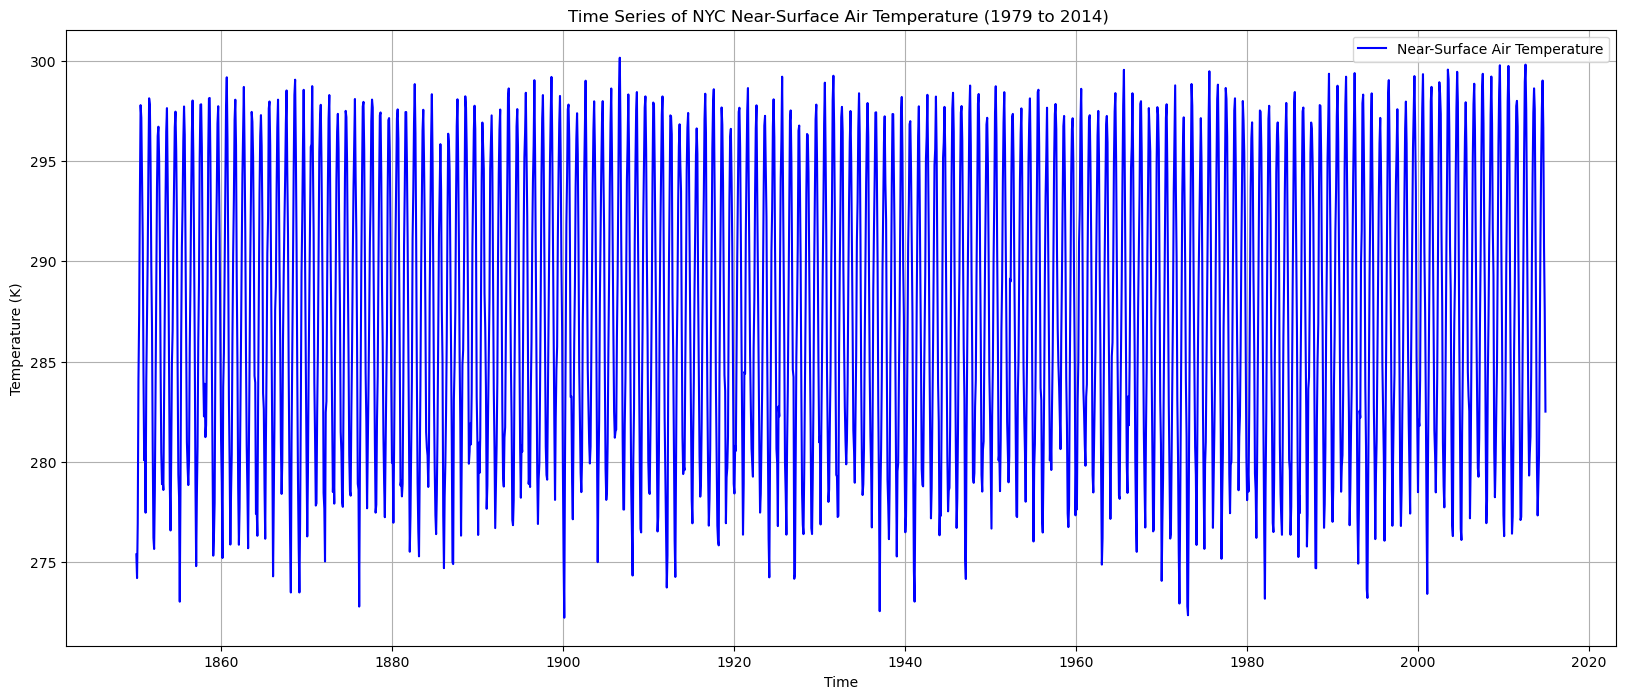

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(time, tas_NYC, label='Near-Surface Air Temperature', color='b')
ax.set_title("Time Series of NYC Near-Surface Air Temperature (1979 to 2014) ")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (K)")
ax.legend()
ax.grid()
plt.show()

Great job! We now have our time series plot of globally averaged surface air temperature.

## **NOTE**

__Do not use this data for publication yet because grid cells are not weighted by area, which could lead to misleading regional averages.__

Right now we are focusing on the basics of how to average across dimensions and create a plot. However, when working with time series for a real scientific application, it is important to weight the grid cells by area prior to averaging because this will allow our plot to have...

Accurate Averages: Weighting grid cells by their area ensures that regional average climate plots accurately reflect the true climate of the region.

Avoid Misleading Data: It can lead to inaccurate regional averages. Proper weighting ensures your climate data is represented correctly.

_For a small enough region, weighting is not going to affect things much_; in the example above, New York City is represented by a single grid point, and so weighting will not change the answer at all. However, if your region is quite large, especially if it spans a large range in latitude, the weighting becomes quite important indeed!

For details on how to create the weights and use them in your average, see the "Weight Grid Cells + Plot Global Averages" tutorial in this repo.